# **Data Cleaning Notebook**

## Objectives

* To Evaluate missing data
* Clean data

## Inputs

* outputs/datasets/collection/HousePricesRecords.csv

## Outputs

* Generate cleaned Train and Test datasets
* Save both under the outputs/datasets/cleaned

## Additional Comments

* Data Cleaning Pipeline
* MeanMedianImputer - [BedroomAbvGr, 2ndFlrSF, GarageYrBlt, MasVnrArea, EnclosedPorch, WoodDeckSF]
* MeanMedianImputer - [LotFrontage]
* Categorical Variable Imputation - [BsmtFinType1, GarageFinish]


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

# Load Collected data

Load raw data and display 3 rows

In [4]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/HousePricesRecords.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Data Exploration

We explore the distribution and shape of a variable with missing data and create a Pandas profiling for these variables.

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
df.filter(vars_with_missing_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtFinType1   1346 non-null   object 
 3   EnclosedPorch  136 non-null    float64
 4   GarageFinish   1298 non-null   object 
 5   GarageYrBlt    1379 non-null   float64
 6   LotFrontage    1201 non-null   float64
 7   MasVnrArea     1452 non-null   float64
 8   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(2)
memory usage: 102.8+ KB


Explore missing data using Pandas Profiling report

In [6]:
from pandas_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

## Handling Missing Data

From Data Exploration analysis above it was deduce there is need for handling 7 numeric and 2 categorical variables with missing data with:

The remaining variables have low missing data level with the most less than 20%. Therefore will require suitable imputation approach.

### MeanMedianImputer for Median Imputation 

* 2ndFlrSF: Missing data of 5.9%. With majority of the data are zeros and the median is also zero. Therefore, imputation of median value will be suitable.

* BedroomAbvGr: Missing data of 6.8%, with a mean of 2.9 and a median of 3. Imputation of median value will be suitable for the distribution.

* GarageYrBlt: Missing data of 5.5%. As this variable is not normally distributed. Imputation of median value will be suitable for the distribution.

* MasVnrArea: Missing data of 0.5%. With majority of the data existing are zeros and the median is also zero. Therefore, imputing the median value is suitable.

* "EnclosedPorch" and "WoodDeckSF": having the most missing data of 90.7% and 89.4% respectively. The level of the missing data is very high, which suggests that dropping these variables is one approach. However, the panads profile report shows that the majority of the missing values are zeros and the median is also zero. Therefore, median imputation another approach.

### CategoricalVariableImputer for Most Frequent

* BsmtFinType1: Missing data of 7.8%, with top frequency count of "Unf" for Unfinished at 27.1%. As this is a categorical variable, an inputation the most frequent category, "Unf" will be suitable.

* GarageFinish: Missing data of 11.1%, with top frequency count of "Unf" for Unfinished at 37.4%. As this is a categorical variable, an inputation the most frequent category, "Unf" will be suitable.

### MeanMedianImputer for Mean Imputation

* LotFrontage: Missing data of 17.7%. Its distribution is approximately. The mean is greater than the median and positively skewed distribution. So, using mean imputation may be appropriate.


In [7]:
df.isna().sum()

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1      114
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      162
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

###  Assess the effect on the variable's distribution.

We use the custom function to assess the effect of the data cleaning on the variable distribution.

Note: The custom function was taken from Code Institute lesson materials - "Feature Engine Unit 9: Custom Functions for Data Cleaning and Feature Engineering Workflow".

In [8]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

### Median Imputation

Selected Variables for median imputation: BedroomAbvGr, 2ndFlrSF, GarageYrBlt, MasVnrArea, EnclosedPorch, WoodDeckSF.


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'BedroomAbvGr', 'EnclosedPorch', 'GarageYrBlt', 'MasVnrArea', 'WoodDeckSF'] 




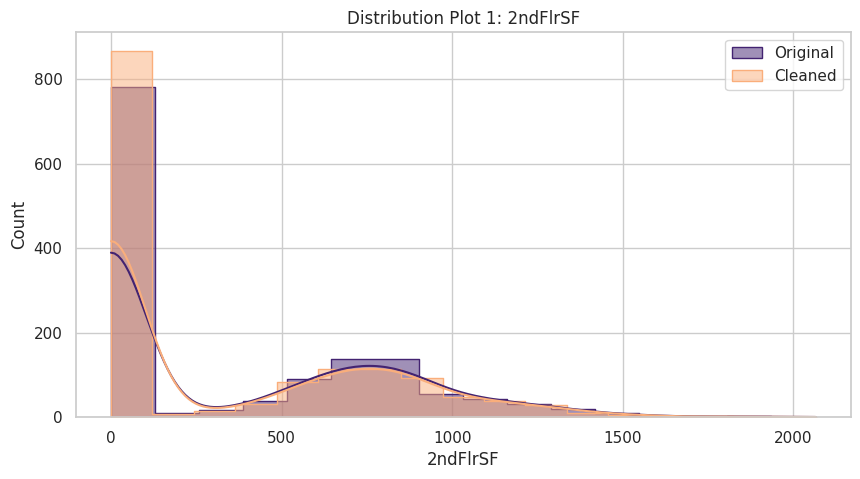

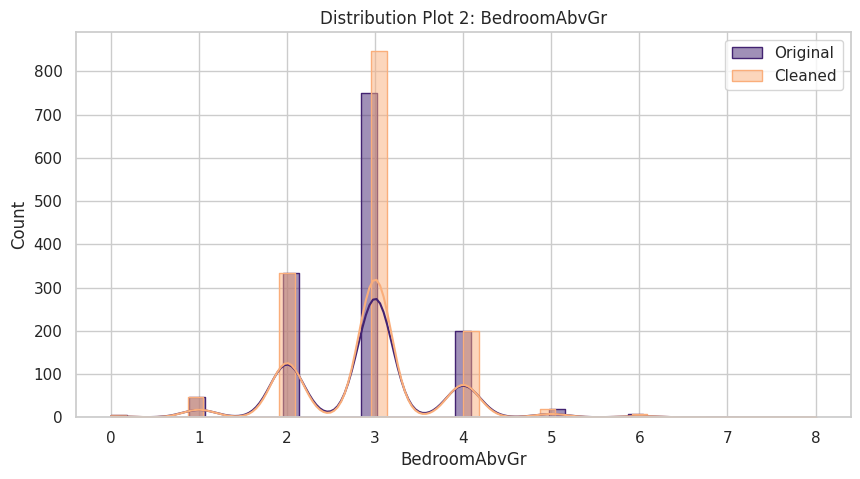

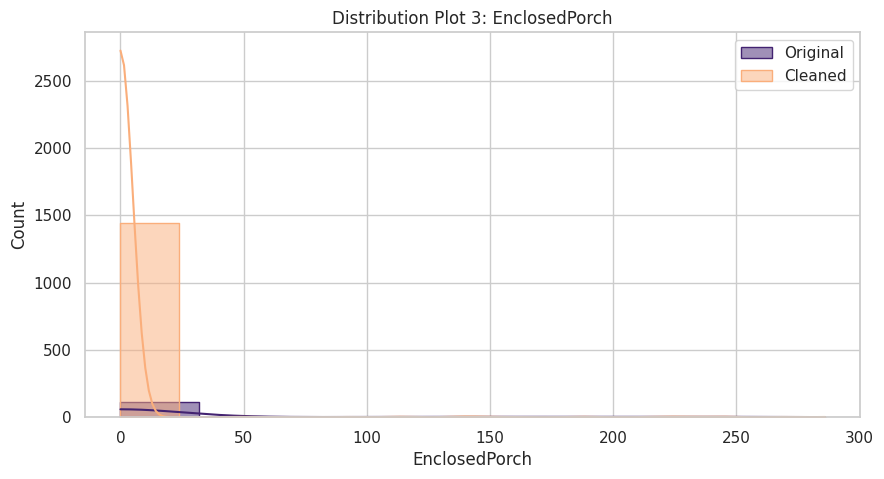

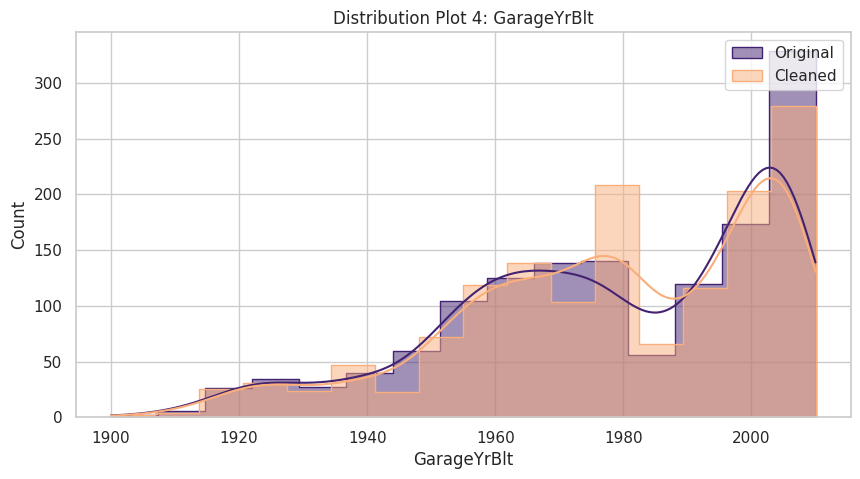

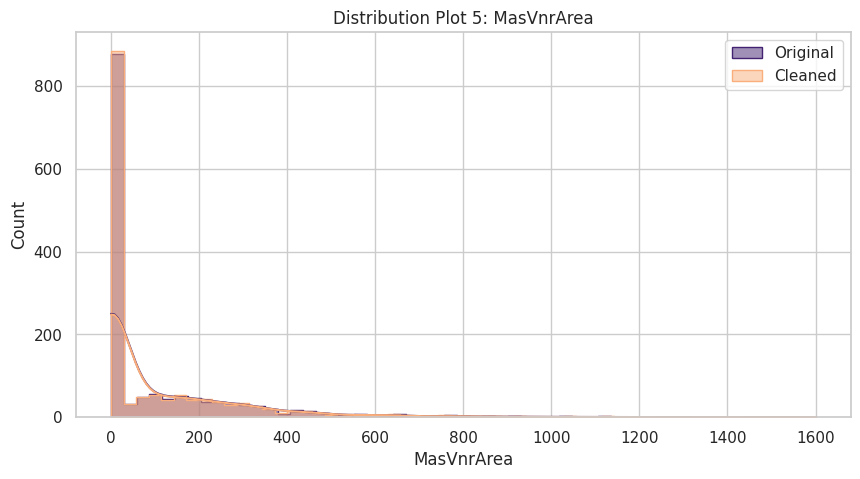

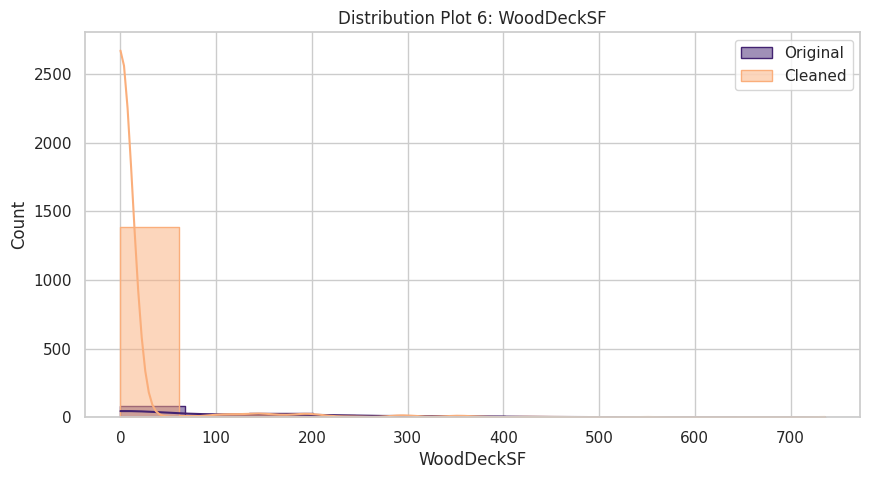

In [9]:
from feature_engine.imputation import MeanMedianImputer

variables_method = ['2ndFlrSF', 'BedroomAbvGr', 'EnclosedPorch', 'GarageYrBlt','MasVnrArea', 'WoodDeckSF']
imputer = MeanMedianImputer(imputation_method='median', 
                            variables=variables_method)

df_method = df.copy()
df_method = imputer.fit_transform(df_method)

# The function plots in the same Axes the distribution before and after applying the method.
DataCleaningEffect(df_original=df,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_method)

In [10]:
# Check non-null field after imputation
df_method.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
BedroomAbvGr       0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinType1     114
BsmtUnfSF          0
EnclosedPorch      0
GarageArea         0
GarageFinish     162
GarageYrBlt        0
GrLivArea          0
KitchenQual        0
LotArea            0
LotFrontage      259
MasVnrArea         0
OpenPorchSF        0
OverallCond        0
OverallQual        0
TotalBsmtSF        0
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
SalePrice          0
dtype: int64

### Mean Imputation


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['LotFrontage'] 




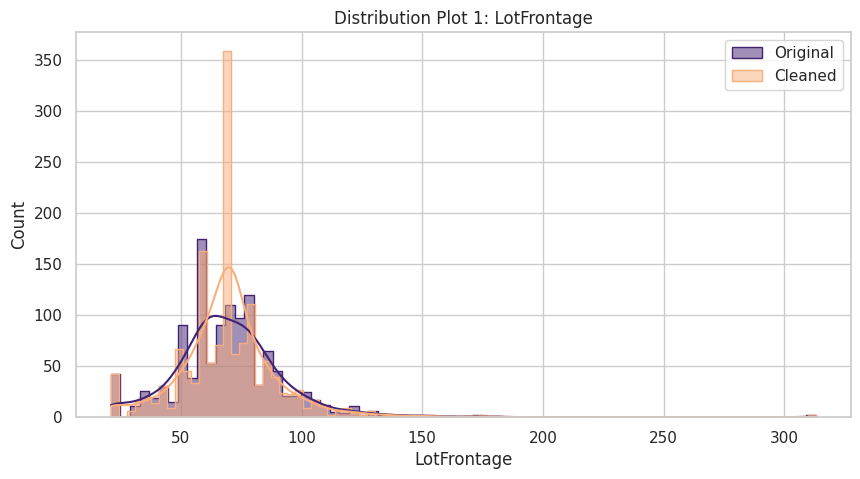

In [11]:
variables_method = ['LotFrontage']
imputer = MeanMedianImputer(imputation_method='mean', 
                            variables=variables_method)

df_method = imputer.fit_transform(df_method)

DataCleaningEffect(df_original=df,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_method)

In [12]:
#Check non-null field after imputation
df_method.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
BedroomAbvGr       0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinType1     114
BsmtUnfSF          0
EnclosedPorch      0
GarageArea         0
GarageFinish     162
GarageYrBlt        0
GrLivArea          0
KitchenQual        0
LotArea            0
LotFrontage        0
MasVnrArea         0
OpenPorchSF        0
OverallCond        0
OverallQual        0
TotalBsmtSF        0
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
SalePrice          0
dtype: int64

### Most Frequent Imputation

In [13]:
from feature_engine.imputation import CategoricalImputer

variables_method = ['BsmtFinType1', 'GarageFinish']

imputer = CategoricalImputer(imputation_method='frequent', 
                            variables=variables_method)

df_method = imputer.fit_transform(df_method)

In [14]:
#Check non-null field after imputation
df_method.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
GrLivArea        0
KitchenQual      0
LotArea          0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
SalePrice        0
dtype: int64


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BsmtFinType1', 'GarageFinish'] 




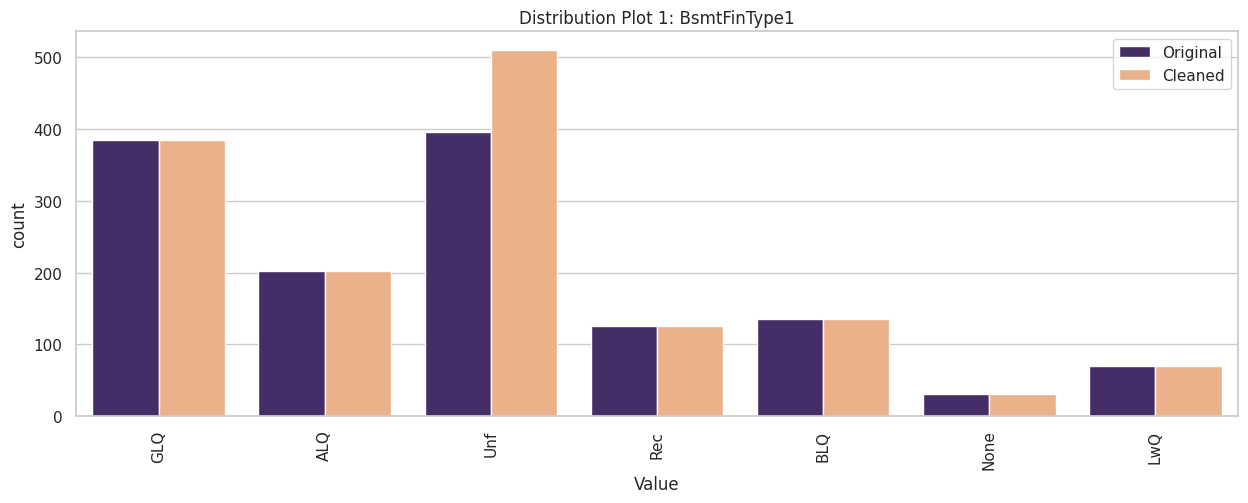

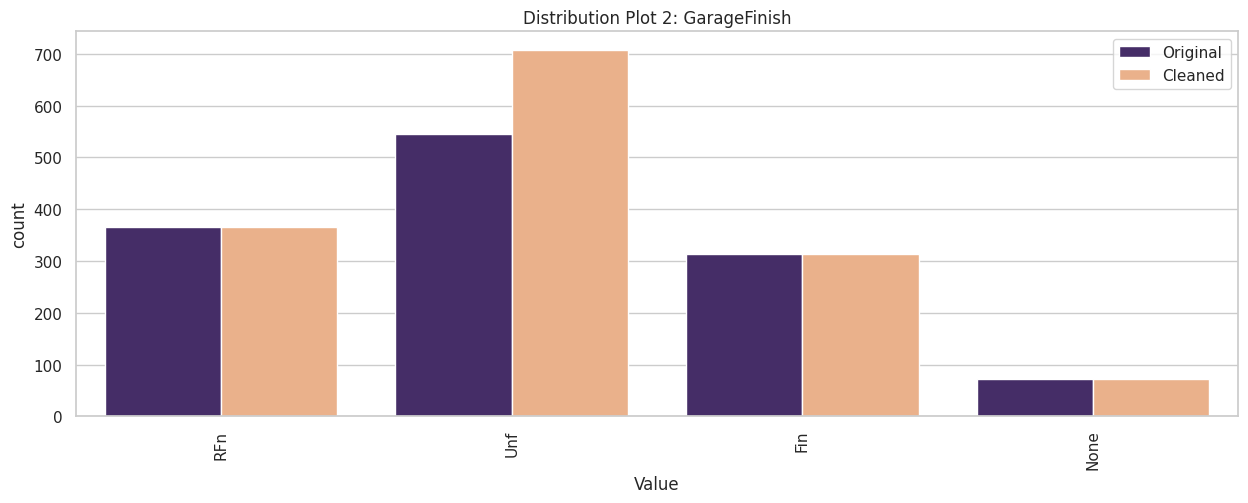

In [15]:
# The function plots in the same Axes the distribution before and after applying the method.
DataCleaningEffect(df_original=df,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_method)

We notice the "peak" in the variables distribution after the imputation methods except for GaragrYrBlt, which has the original trend higher than the cleaned. This is expected as the the distribution originally has a negative skweness.

Function display the missing data levels in a DataFrame: it shows returns how
many rows have missing data, the percentage of missing data and the column datatype.. This was taken from the Code Institute Churnometer Walkthrough Project notebooks.

In [16]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

## Split Data into Train and Test Sets

In [17]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet, _, __ = train_test_split(
                                        df_method,
                                        df_method['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


### Apply the transformation to the data

In [18]:
from feature_engine.imputation import MeanMedianImputer

variables_method = ['2ndFlrSF', 'BedroomAbvGr', 'EnclosedPorch', 'GarageYrBlt','MasVnrArea', 'WoodDeckSF']
imputer = MeanMedianImputer(imputation_method='median', 
                            variables=variables_method)

df_method = imputer.fit_transform(TrainSet)

# transform the data
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

In [19]:
variables_method = ['LotFrontage']
imputer = MeanMedianImputer(imputation_method='mean', 
                            variables=variables_method)

df_method = imputer.fit_transform(df_method)

# transform the data
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

In [20]:
from feature_engine.imputation import CategoricalImputer

variables_method = ['BsmtFinType1', 'GarageFinish']

imputer = CategoricalImputer(imputation_method='frequent', 
                            variables=variables_method)

df_method = imputer.fit_transform(df_method)

# transform the data
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

We do the final Evaluatuation of Missing Data for the TrainSet and TestSet

In [21]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


In [22]:
df_missing_data = EvaluateMissingData(TestSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


---

# Push files to Repo

* We create the “outputs” folder and save the data under dataset/collection folder.

In [23]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)


Save the Train set as a CSV file

In [24]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

Save the Test set as a CSV file

In [25]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)